# TSF GRIP October 2021

## Prediction Using Supervised ML

### By- Aakhyat Singh

Importing the libraries required

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

Importing the dataset

In [2]:
d=pd.read_csv('http://bit.ly/w-data')
d.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Visualizing the data

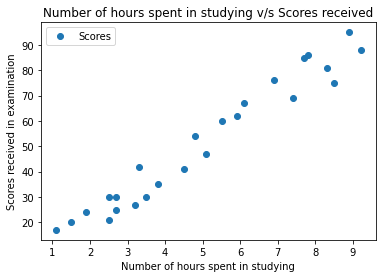

In [4]:
d.plot(x='Hours',y='Scores',style='o')
plt.title('Number of hours spent in studying v/s Scores received')
plt.xlabel('Number of hours spent in studying')
plt.ylabel('Scores received in examination')
plt.show()

Preparing data for further analysis by dividing it into **attributes** and **labels**

In [5]:
X=d.iloc[:,:-1].values
Y=d.iloc[:,1].values

In [6]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2, random_state=0)
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(20, 1) (20,)
(5, 1) (5,)


### Training the Algorithm

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)
print("Training completed")

Training completed


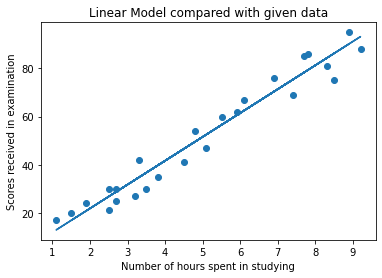

In [8]:
#Plotting the Linear Regression line
l=(lr.coef_*X)+lr.intercept_
#Plotting the test data
plt.scatter(X,Y)
plt.plot(X,l)
plt.title('Linear Model compared with given data')
plt.xlabel('Number of hours spent in studying')
plt.ylabel('Scores received in examination')
plt.show()

### Making predictions

In [9]:
#Predicting the scores
Ypred=lr.predict(Xtest)

In [10]:
#Comparing real scores with the predicted ones as per the model
df=pd.DataFrame({'Real':Ytest,'Predicted':Ypred})
print(df)

   Real  Predicted
0    20  16.884145
1    27  33.732261
2    69  75.357018
3    30  26.794801
4    62  60.491033


In [11]:
#Calculating Mean Absolute Error of given model
t=sklearn.metrics.mean_absolute_error(Ytest,Ypred)
print("Mean Absolute Error = ",t)

Mean Absolute Error =  4.183859899002975


Calculating the score a student would obtain if he/she studied for 9.25 hours a day

In [12]:
calc=lr.predict([[9.25]])
print("Number of hours spent in studying = 9.25")
print("Score predicted = ",calc[0])

Number of hours spent in studying = 9.25
Score predicted =  93.69173248737538
